In [15]:
import numpy as np
import matplotlib.pyplot as plt 

# Linear case

In [10]:
T = 1; N = 100; d = T/N; 
p = np.array((7,7)); w = 10**4
X = np.zeros((N,2))
U = np.zeros((N,2))

def f(x:"R^2", u:"R^2") -> "R^2":
    return x + d*u

def Dl(x:"R^2", u:"R^2") -> "R^4 -> R":
    return np.concatenate(([0,0], 2*u))

D2l= np.pad(2*np.eye(2), (2,0), "constant") #R^4*4

Df = np.concatenate((np.eye(2),d*np.eye(2)), axis =1)

D2f = 0 #I should precise its type which is R^2*4*4

def DVstar_N (x:"R^2") ->"R^2 -> R":
    return w*(x - p)

def D2Vstar_N(x:"R^2") ->"R^2*2":
    return w* np.eye(2) #

In [11]:
from scipy.signal import unit_impulse
basis = [unit_impulse(4,i) for i in range(4)]

DVstar_list_inv = [DVstar_N(X[-1])] #DV*_{n-1}(x_{n-1})
D2Vstar_list_inv = [D2Vstar_N(X[-1])]

DV_list_inv = []
D2V_list_inv = []

#backward pass, begin with DV_n-2
for t in range(N-2, -1, -1): #from N-2 to 0
    DV = Dl(X[t], U[t]) + DVstar_list_inv[-1] @ Df
    D2V = np.reshape([ei @ D2l @ ej + (Df @ ej) @ D2Vstar_list_inv[-1] @ (Df @ ei) for ei in basis for ej in basis], (4,4))

    DV_list_inv.append(DV)
    D2V_list_inv.append(D2V)
    
    DVstar = DV[:2] + DV[2:] @ np.linalg.inv(D2V[2:, 2:]) @ D2V[2:, :2]
    D2Vstar = D2V[:2, :2] + D2V[:2, 2:] @ np.linalg.inv(D2V[2:, 2:]) @ D2V[2:, :2]
   
    DVstar_list_inv.append(DVstar)
    D2Vstar_list_inv.append(D2Vstar)
    
    

In [13]:
DV = DV_list_inv[::-1]
D2V = D2V_list_inv[::-1]

X_hat = np.copy(X)
#forward pass
for t in range(N-1):
    if t == 0:
        h_u = -np.linalg.inv(D2V[t][2:, 2:]) @ DV[t][2:]
        U[t] = U[t] + h_u
        X_hat[t+1] = f(X_hat[t], U[t])
    else:
        h_x = X_hat[t] - X[t]
        h_u = -np.linalg.inv(D2V[t][2:, 2:]) @ (DV[t][2:] + D2V[t][2:, :2] @ h_x)
        U[t] = U[t] + h_u
        X_hat[t+1] = f(X_hat[t], U[t])

In [14]:
X_hat[-1]

array([7., 7.])

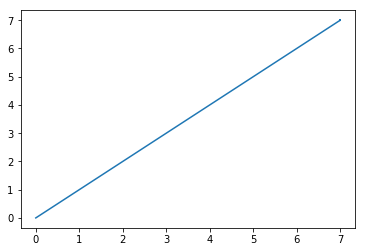

In [16]:
plt.plot(X_hat[:, 0], X_hat[:, 1])

In [46]:
# from scipy.signal import unit_impulse
# basis = [unit_impulse(4,i) for i in range(4)]


# # @info
# def DV(i, x, u)->"R^4 -> R":
#     DVstar_f_x_u = DVstar(i+1, f(x,u))
#     return Dl(x,u) + DVstar_f_x_u @ Df

# # @info
# def D2V(i, x, u) -> "R^4*4":
# #     def d2v_x_u(h1:"R^4", h2:"R^4"):
# #         D2Vstar_ = D2Vstar(i+1, f(x,u))
# #         return h1 @ D2l @ h2 + (Df @ h2) @ D2Vstar_ @ (Df @ h1)
# #     #I omitted one term because it is 0
#     D2Vstar_ = D2Vstar(i+1, f(x,u))
#     return np.reshape([ei @ D2l @ ej + (Df @ ej) @ D2Vstar_ @ (Df @ ei) for ei in basis for ej in basis], (4,4))

# # @info
# def DVstar(i, x) ->"R^2 ->R": #the choice of u is important
#     if i == N-1:
#         return DVstar_N(x)
    
#     u = U[i]
# #     Nabla_V_x_u = DV(i, x, u)
# #     D2V_x_u = D2V(i, x, u)
# #     h_u = -np.linalg.inv(D2V_x_u[2:, 2:]) @ Nabla_V_x_u[2:]
# #     u = u + h_u

#     DV_x_u = DV(i, x, u)
#     D2V_x_u = D2V(i, x, u)
#     return DV_x_u[:2] + DV_x_u[2:] @ np.linalg.inv(D2V_x_u[2:, 2:]) @ D2V_x_u[2:, :2]

# # @info
# def D2Vstar(i, x)  ->"R^2*2":#not sure 
#     if i == N-1:
#         return D2Vstar_N(x)
    
#     u = U[i]
# #     Nabla_V_x_u = DV(i, x, u)
# #     D2V_x_u = D2V(i, x, u)
# #     h_u = -np.linalg.inv(D2V_x_u[2:, 2:]) @ Nabla_V_x_u[2:]
# #     u = u + h_u
    
#     D2V_x_u = D2V(i, x, u)
#     return  D2V_x_u[:2, :2] + D2V_x_u[:2, 2:] @ np.linalg.inv(D2V_x_u[2:, 2:]) @ D2V_x_u[2:, :2]



In [47]:
# #Forward pass
# X_hat = X
# # U_hat = U

# for i in range(N-1):
#     print("i=", i)
#     x = X[i]
#     u = U[i]
#     h_x = X_hat[i] - x
    
#     begin = time.time()
#     Nabla_V_x_u = DV(i, x, u)
#     end = time.time()
#     print("Nabla_V_x_u ","computing time =", end - begin)
    
#     begin = time.time()
#     D2V_x_u = D2V(i, x, u)
#     end = time.time()
#     print("D2V_x_u ","computing time =", end - begin)

# #     print(D2V_x_u[2:, 2:])
# #     print(D2V_x_u[2:, :2])
#     h_u = -np.linalg.inv(D2V_x_u[2:, 2:]) @ (Nabla_V_x_u[2:] + D2V_x_u[2:, :2] @ h_x)
#     U[i] = u + h_u
#     X_hat[i+1] = f(X_hat[i], U[i])
#     print( "x_{}=".format(i+1), X_hat[i+1], "u_{}=".format(i), U[i] )

i= 0
Nabla_V_x_u  computing time = 0.38796162605285645
D2V_x_u  computing time = 0.00794672966003418
x_1= [707. 707.] u_0= [700. 700.]
i= 1
Nabla_V_x_u  computing time = 0.3810122013092041
D2V_x_u  computing time = 0.007932424545288086
x_2= [-70700. -70700.] u_1= [-70000. -70000.]
i= 2
Nabla_V_x_u  computing time = 0.3660125732421875
D2V_x_u  computing time = 0.00900721549987793
x_3= [7141406.99999998 7141406.99999998] u_2= [7070699.99999998 7070699.99999998]
i= 3
Nabla_V_x_u  computing time = 0.3619999885559082
D2V_x_u  computing time = 0.008977413177490234
x_4= [-7.212814e+08 -7.212814e+08] u_3= [-7.1414e+08 -7.1414e+08]
i= 4
Nabla_V_x_u  computing time = 0.3532373905181885
D2V_x_u  computing time = 0.008794307708740234
x_5= [7.28494221e+10 7.28494221e+10] u_4= [7.21281407e+10 7.21281407e+10]
i= 5
Nabla_V_x_u  computing time = 0.35706615447998047
D2V_x_u  computing time = 0.007976531982421875
x_6= [-7.35779163e+12 -7.35779163e+12] u_5= [-7.28494221e+12 -7.28494221e+12]
i= 6
Nabla_V_x

Nabla_V_x_u  computing time = 0.12167692184448242
D2V_x_u  computing time = 0.0049839019775390625
x_47= [1.10642966e+95 1.10642966e+95] u_46= [1.09547491e+95 1.09547491e+95]
i= 47
Nabla_V_x_u  computing time = 0.12667202949523926
D2V_x_u  computing time = 0.005945920944213867
x_48= [-1.11749396e+97 -1.11749396e+97] u_47= [-1.10642966e+97 -1.10642966e+97]
i= 48
Nabla_V_x_u  computing time = 0.1216745376586914
D2V_x_u  computing time = 0.007091999053955078
x_49= [1.1286689e+99 1.1286689e+99] u_48= [1.11749396e+99 1.11749396e+99]
i= 49
Nabla_V_x_u  computing time = 0.11461114883422852
D2V_x_u  computing time = 0.005955934524536133
x_50= [-1.13995559e+101 -1.13995559e+101] u_49= [-1.1286689e+101 -1.1286689e+101]
i= 50
Nabla_V_x_u  computing time = 0.10172843933105469
D2V_x_u  computing time = 0.005983591079711914
x_51= [1.15135514e+103 1.15135514e+103] u_50= [1.13995559e+103 1.13995559e+103]
i= 51
Nabla_V_x_u  computing time = 0.09389853477478027
D2V_x_u  computing time = 0.004988431930541

Nabla_V_x_u  computing time = 0.002991199493408203
D2V_x_u  computing time = 0.0025603771209716797
x_94= [-1.02544735e+189 -1.02544735e+189] u_93= [-1.01529441e+189 -1.01529441e+189]
i= 94
Nabla_V_x_u  computing time = 0.0029931068420410156
D2V_x_u  computing time = 0.0011594295501708984
x_95= [7.10754901e+190 7.10754901e+190] u_94= [7.03717724e+190 7.03717724e+190]
i= 95
Nabla_V_x_u  computing time = 0.001615762710571289
D2V_x_u  computing time = 0.0009975433349609375
x_96= [-4.16734035e+192 -4.16734035e+192] u_95= [-4.12607956e+192 -4.12607956e+192]
i= 96
Nabla_V_x_u  computing time = 0.0009989738464355469
D2V_x_u  computing time = 0.0009980201721191406
x_97= [2.03193768e+194 2.03193768e+194] u_96= [2.01181948e+194 2.01181948e+194]
i= 97
Nabla_V_x_u  computing time = 0.001026153564453125
D2V_x_u  computing time = 0.0
x_98= [-8.20902821e+195 -8.20902821e+195] u_97= [-8.12775071e+195 -8.12775071e+195]
i= 98
Nabla_V_x_u  computing time = 0.0
D2V_x_u  computing time = 0.00100064277648925

In [19]:
from functools import wraps
def info(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print("callee: {}_{}".format(func.__name__, args[0]))
        begin = time.time()
        res  = func(*args, **kwargs)
        end = time.time()
        print("{}_{} computing time =".format(func.__name__, args[0]), end - begin)
        return res
    return wrapper

1 2


In [ ]:
# DVstar_list_inv = [DVstar_N]
# D2Vstar_list_inv = [D2Vstar_N]

# DV_list_inv = []
# D2V_list_inv = []

# DVs = DV_list_inv[::-1]
# D2Vs = D2V_list_inv[::-1]

# #backward pass
# for i in range(N-1, 0, -1):
#     #use early bindings for functions!!!
#     @info
#     def dv(x, u, DVstar = DVstar, i=i) ->"R^4 -> R":
#         DVstar_f_x_u = DVstar(f(x,u))
#         return Dl(x,u) + DVstar_f_x_u @ Df

#     DV = dv
#     del dv
#     DV_list_inv.append(DV)
    
#     def d2v(x,u, D2Vstar = D2Vstar, i=i) -> "R^4*4":
#         def d2v_x_u(h1:"R^4", h2:"R^4", D2Vstar = D2Vstar):
#             return h1 @ D2l @ h2 + (Df @ h2) @ D2Vstar(f(x,u)) @ (Df @ h1)
#         #I omitted one term because it is 0
#         res = np.reshape([d2v_x_u(ei, ej) for ei in basis for ej in basis], (4,4))
#         end = time.time()
#         print(" D2V_{}".format(i), "computing time =", end - begin)
#         return res
#     D2V = d2v
#     del d2v
#     D2V_list_inv.append(D2V)
    
#     u = U[i-1]
#     def dvstar(x, u=u, DV = DV, D2V = D2V, i=i) ->"R^2 ->R":
#         DV_x_u = DV(x, u)
#         D2V_x_u = D2V(x, u)
#         res = DV_x_u[:2] + DV_x_u[2:] @ np.linalg.inv(D2V_x_u[2:, 2:]) @ D2V_x_u[2:, :2]
#         end = time.time()
#         print(" DVstar[", i, "]", "computing time =", end - begin)
#         return res
#     DVstar = dvstar
#     del dvstar
#     DVstar_list_inv.append(DVstar)
    
#     def d2vstar(x, u=u, D2V = D2V, i=i) ->"R^2*2":#not sure
#         D2V_x_u = D2V(x,u)
#         res =  D2V_x_u[:2, :2] + D2V_x_u[:2, 2:] @ np.linalg.inv(D2V_x_u[2:, 2:]) @ D2V_x_u[2:, :2]
#         end = time.time()
#         print(" D2Vstar[", i, "]", "computing time =", end - begin)
#         return res
#     D2Vstar = d2vstar
#     del d2vstar
#     D2Vstar_list_inv.append(D2Vstar)
# #backward pass
# for i in range(N-1, 0, -1):
#     global DVstar, D2Vstar
#     #use early bindings for functions!!!
#     def dv(x, u, DVstar = DVstar, i=i) ->"R^4 -> R":
#         print("function call: DV_{}".format(i))
#         begin = time.time()
#         DVstar_f_x_u = DVstar(f(x,u))
#         res = Dl(x,u) + DVstar_f_x_u @ Df
#         end = time.time()
#         print(" DV[", i, "]", "computing time =", end - begin)
#         return res
#     DV = dv
#     del dv
#     DV_list_inv.append(DV)
    
#     def d2v(x,u, D2Vstar = D2Vstar, i=i) -> "R^4*4":
#         print("function call: D2V_{}".format(i))
#         begin = time.time()
#         def d2v_x_u(h1:"R^4", h2:"R^4", D2Vstar = D2Vstar):
#             return h1 @ D2l @ h2 + (Df @ h2) @ D2Vstar(f(x,u)) @ (Df @ h1)
#         #I omitted one term because it is 0
#         res = np.reshape([d2v_x_u(ei, ej) for ei in basis for ej in basis], (4,4))
#         end = time.time()
#         print(" D2V_{}".format(i), "computing time =", end - begin)
#         return res
#     D2V = d2v
#     del d2v
#     D2V_list_inv.append(D2V)
    
#     u = U[i-1]
#     def dvstar(x, u=u, DV = DV, D2V = D2V, i=i) ->"R^2 ->R":
#         print("function call: DVstar_{}".format(i))
#         begin = time.time()
#         DV_x_u = DV(x, u)
#         D2V_x_u = D2V(x, u)
#         res = DV_x_u[:2] + DV_x_u[2:] @ np.linalg.inv(D2V_x_u[2:, 2:]) @ D2V_x_u[2:, :2]
#         end = time.time()
#         print(" DVstar[", i, "]", "computing time =", end - begin)
#         return res
#     DVstar = dvstar
#     del dvstar
#     DVstar_list_inv.append(DVstar)
    
#     def d2vstar(x, u=u, D2V = D2V, i=i) ->"R^2*2":#not sure
#         print("function call: D2Vstar_{}".format(i))
#         begin = time.time()
#         D2V_x_u = D2V(x,u)
#         res =  D2V_x_u[:2, :2] + D2V_x_u[:2, 2:] @ np.linalg.inv(D2V_x_u[2:, 2:]) @ D2V_x_u[2:, :2]
#         end = time.time()
#         print(" D2Vstar[", i, "]", "computing time =", end - begin)
#         return res
#     D2Vstar = d2vstar
#     del d2vstar
#     D2Vstar_list_inv.append(D2Vstar)
    